# Albeno effekt
---


#### Kode 1


Denne koden henter ut albedo effekten i alpene fra 2004 til 2024 hvor feil marginen er lav fra data_m-lavfeilmargin (oppgave 3 fil*). Deretter tar den dataen år for år og regner ut gjennomsnitt, standardavvik og median og lagrer alt i en matrise array.


In [ ]:

import pandas as pd
import glob
import os
import matplotlib.pyplot as plt


# Laster inn referanse datafil med lat/lon
referanse_df = pd.read_csv("../data/csv_albedo_effekt/data_m-lavfeilmargin.csv")

# Henter CSV-filene
datafiler = sorted(glob.glob("../data/csv_albedo_effekt/Albedo*.csv")) # Filene sorteres etter årstall

# Lister for lagring
årstall_liste = []
gjennomsnitt_liste = []
median_liste = []
standardavvik_liste = []

# Gå gjennom hver fil og beregn statistikk
for fil in datafiler:
    df = pd.read_csv(fil)
    df["lat"] = df["lat"]
    df["lon"] = df["lon"]

    felles = pd.merge(referanse_df, df, on=["lat", "lon"], how="inner")

    if "AL-BB-DH" in felles.columns and not felles["AL-BB-DH"].empty:
        gjennomsnitt = felles["AL-BB-DH"].mean()
        median = felles["AL-BB-DH"].median()
        std_avvik = felles["AL-BB-DH"].std()
    else:
        gjennomsnitt = median = std_avvik = float('nan')

    filnavn = os.path.basename(fil)
    årstall = int(''.join(filter(str.isdigit, filnavn)))

    årstall_liste.append(årstall)
    gjennomsnitt_liste.append(float(gjennomsnitt))
    median_liste.append(float(median))
    standardavvik_liste.append(float(std_avvik))

# Lager matrise: hver rad er [år, gjennomsnitt, median, standardavvik]
albedo_matrise = np.column_stack((årstall_liste, gjennomsnitt_liste, median_liste, standardavvik_liste))

# Ber den printe 4 desimaler
np.set_printoptions(suppress=True, precision=4)

# Print matrise
print("\n📊 Albedo-statistikk matrise:")
print("[År, Gjennomsnitt, Median, Standardavvik]")
print(albedo_matrise)


📊 Albedo-statistikk matrise:
[År, Gjennomsnitt, Median, Standardavvik]
[[2004.        0.1569    0.1594    0.034 ]
 [2005.        0.1577    0.1613    0.034 ]
 [2006.        0.1581    0.1618    0.0333]
 [2007.        0.1536    0.1569    0.0332]
 [2008.        0.1571    0.1599    0.0325]
 [2009.        0.1572    0.1612    0.0332]
 [2010.        0.1568    0.1598    0.0326]
 [2011.        0.1502    0.1533    0.0347]
 [2012.        0.1577    0.1606    0.0338]
 [2013.        0.1534    0.1567    0.0332]
 [2014.        0.1543    0.1574    0.033 ]
 [2015.        0.1561    0.1594    0.0332]
 [2016.        0.1512    0.1536    0.0339]
 [2017.        0.1545    0.1576    0.0335]
 [2018.        0.1562    0.1582    0.0317]
 [2019.        0.1562    0.1592    0.0308]
 [2020.        0.1512    0.1541    0.0315]
 [2021.        0.1596    0.1633    0.0315]
 [2022.        0.1557    0.1587    0.0304]
 [2023.        0.1392    0.1387    0.0291]
 [2024.        0.1568    0.1585    0.0274]]


### Kode 1.2
Plotter Matrisen i en combo chart med matplotlib. For å fremvise dataen.


### Kommentar

Gjennomsnittet varierer mellom 0.15 og 0.158. Utenom 2023 som kan tyde på en feilkildet dette året med verdien 0.1392. Denne feilkilden kan komme av ekstrem varme, isforsvinning eller tekninsk målefeil.
Medianen følger gjennomsnittet tett som tyder på at dataen er symmetrisk fordelt
Standardavviket holder seg konsistent med en dyp mot 2023. Men er såpass lav at gjennomsnittet gir et godt bildet av virkligheten.

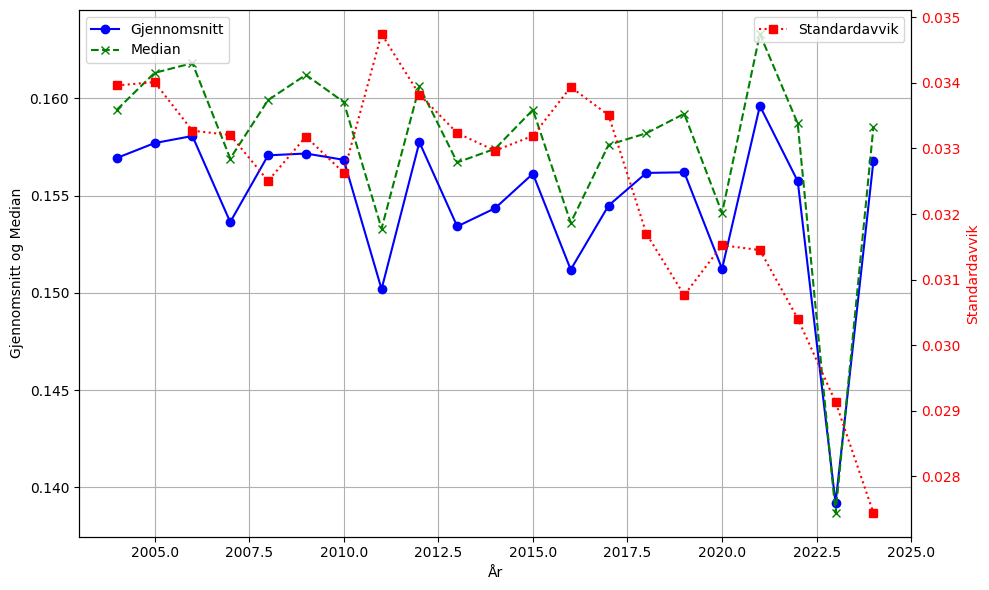

In [ ]:
import matplotlib.pyplot as plt

# Lager et plot med 2 y-akser
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotter gjennomsnitt og median på venstre akse
ax1.plot(årstall_liste, gjennomsnitt_liste, marker='o', linestyle='-', label='Gjennomsnitt', color='blue')
ax1.plot(årstall_liste, median_liste, marker='x', linestyle='--', label='Median', color='green')

# Legger til tittel og etiketter for venstre akse
ax1.set_xlabel("År")
ax1.set_ylabel("Gjennomsnitt og Median", color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Legger til rutenett
ax1.grid(True)

# Lager en annen y-akse for standardavvik
ax2 = ax1.twinx()  # Oppretter en andre y-akse
ax2.plot(årstall_liste, standardavvik_liste, marker='s', linestyle=':', label='Standardavvik', color='red')

# Legger til etikett for høyre akse
ax2.set_ylabel("Standardavvik", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Legger til legende
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Justerer layout for å unngå overlappende etiketter
plt.tight_layout()

plt.show()


### Kode 2
I kode 1 synker ikke grafen som vi antok. 

Vi tar derfor å visualiser data_m-lavfeilmargin i 2004 for å finne ut hva som skjer


### Kommentar
Denne koden visualiserer albedo-data for 2004 som et varmekart, hvor høyere albedo-verdier vises med lysere farger. Kartet kombinerer disse verdiene med røde prikker som markerer geografiske punkter med lav målefeil, noe som indikerer høy datakvalitet. Resultatet gir et raskt og visuelt inntrykk av hvor pålitelige og snødekte områder befinner seg

Vi ser at data med lavfeilmargin ikke befinner seg i høyden med is og snø. Is og snø har generellt sett over 0.3 i albedo og er i visualiseringen farget gult. Vi ser at det er overvekt med støy i datasettet og vi gjennomfører kode 1 med et mere filtrert datasett ved å kun se på områder med snø og is. Dette kalles Signal-to-Noise ratio (SNR) siden data settet inneholder en alt for stor overvekt av støy i forhold til signalet.

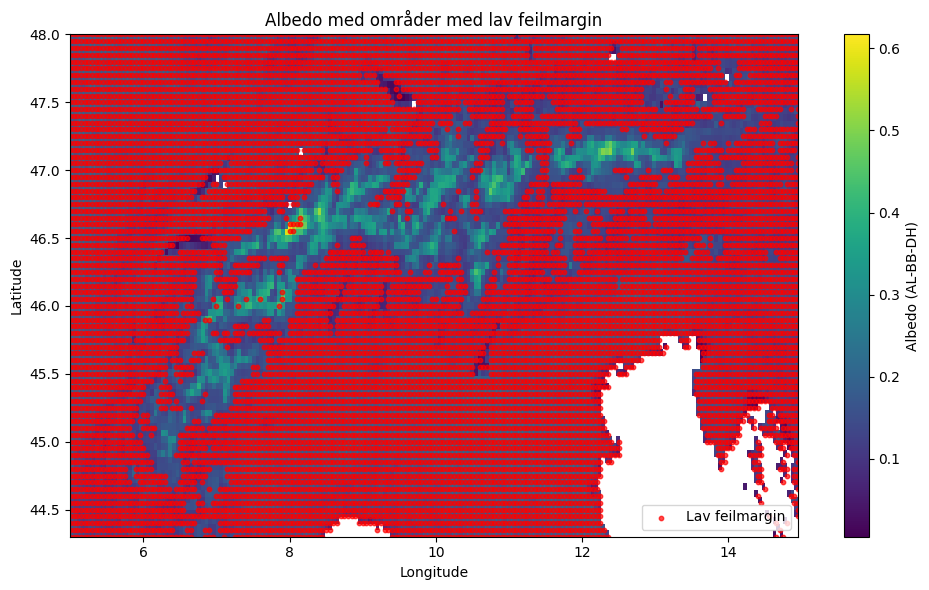

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filstier
hovedfil      = "../data/csv_albedo_effekt/Albedo effekt 2004.csv"
feilmarginfil = "../data/csv_albedo_effekt/data_m-lavfeilmargin.csv"

# Les inn data
df_main  = pd.read_csv(hovedfil)
df_error = pd.read_csv(feilmarginfil)

# Runder koordinater
df_main["lat"]   = df_main["lat"]
df_main["lon"]   = df_main["lon"]
df_error["lat"]  = df_error["lat"]
df_error["lon"]  = df_error["lon"]

# Unike, sorterte koordinater stigende
lat_vals = np.sort(df_main["lat"].unique())   # fra sør til nord
lon_vals = np.sort(df_main["lon"].unique())   # fra vest til øst

# Lag 2D-grid for albedo
albedo_grid = (
    df_main
    .pivot(index="lat", columns="lon", values="AL-BB-DH")
    .reindex(index=lat_vals, columns=lon_vals)
)

# Koordinatgrenser
lon_min, lon_max = lon_vals.min(), lon_vals.max()
lat_min, lat_max = lat_vals.min(), lat_vals.max()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Heatmap med riktig orientering
im = ax.imshow(
    albedo_grid,
    cmap="viridis",
    extent=[lon_min, lon_max, lat_min, lat_max],
    origin="lower",       # viktig for at laveste latitude nederst
    aspect="auto"
)
plt.colorbar(im, ax=ax, label="Albedo (AL-BB-DH)")

# Røde prikker for lav‑feilmargin
ax.scatter(
    df_error["lon"],
    df_error["lat"],
    color='Red',
    s=10,
    label="Lav feilmargin",
    alpha=0.7
)

ax.set_title("Albedo med områder med lav feilmargin")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.tight_layout()
plt.show()

### Kode 3
Vi gjennomfører kode 1 med et mere filtrert datasett ved å kun se på områder med snø og is(>0.3 albedo) 

Vi bruker fill between for å inkludere standard avviket i koden.
Områdene er ikke nødvendigvis like i alle statistiske måligene på grunn av begrensningen >0.3  (3.2*)

### Kommentar

Gjennomsnittet varierer mellom 0.46 og 0.38. Utenom 2013 som kan tyde på en feilkildet dette året med verdien 0.53. Denne feilkilden kan komme av unormale mengder snø, temperatur varisjon eller tekninsk målefeil.
Medianen følger gjennomsnittet tett som tyder på at dataen er symmetrisk fordelt
Standardavviket holder seg konsistent med en dyp mot 2023. Men er såpass lav at gjennomsnittet gir et godt bildet av virkligheten.

Hypotensen at SNR var for høyt og signalet ble dempet var riktig. Nå ser vi en degresjon som vi antok.


📊 Resultatmatrise:
[År, Gjennomsnitt, Median, Standardavvik]
[[2004.        0.4654    0.4521    0.0754]
 [2005.        0.4282    0.417     0.0703]
 [2006.        0.4302    0.4243    0.0742]
 [2007.        0.4667    0.4575    0.0594]
 [2008.        0.4528    0.4388    0.0547]
 [2009.        0.4546    0.4603    0.0624]
 [2010.        0.4234    0.4111    0.0551]
 [2011.        0.402     0.3825    0.0591]
 [2012.        0.4506    0.4444    0.056 ]
 [2013.        0.5235    0.5124    0.0749]
 [2014.        0.4556    0.4661    0.0616]
 [2015.        0.4186    0.4007    0.0662]
 [2016.        0.4675    0.4537    0.0551]
 [2017.        0.4002    0.3955    0.0598]
 [2018.        0.4126    0.3952    0.0724]
 [2019.        0.414     0.4007    0.0799]
 [2020.        0.4022    0.3963    0.0799]
 [2021.        0.426     0.4221    0.0939]
 [2022.        0.3822    0.372     0.0592]
 [2023.        0.3782    0.3664    0.0658]
 [2024.        0.4423    0.4428    0.0852]]


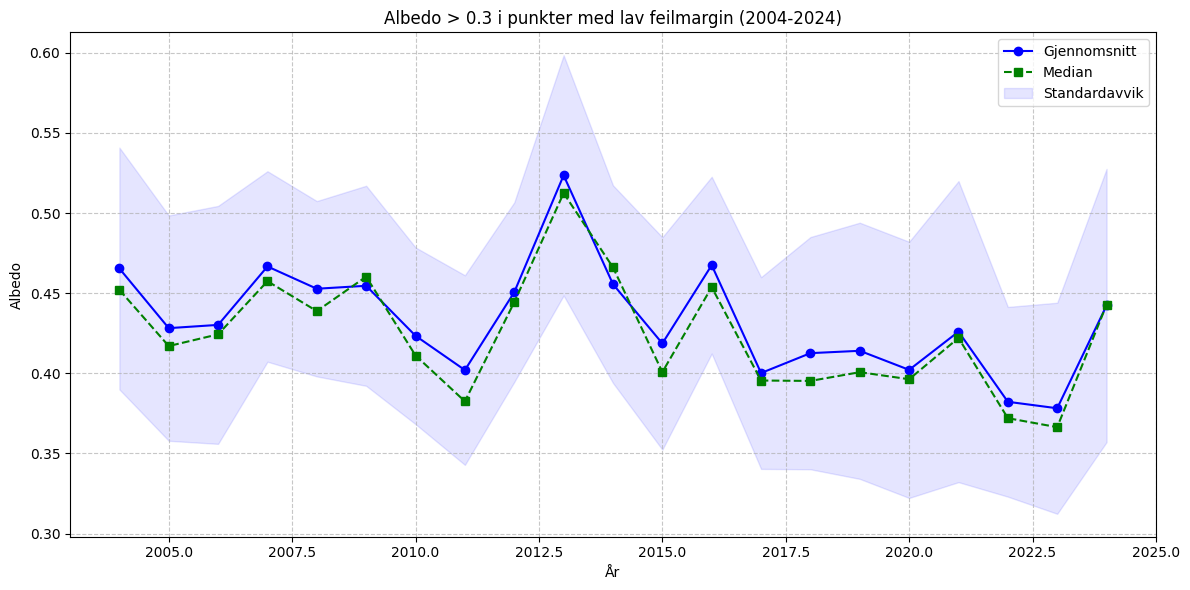

In [9]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

# 1. Last inn referansefil med pre-filtrerte punkter (lav feilmargin)
referanse_df = pd.read_csv("../data/csv_albedo_effekt/data_m-lavfeilmargin.csv")
referanse_df["lat"] = referanse_df["lat"]
referanse_df["lon"] = referanse_df["lon"]

# 2. Hent alle albedo-filer
datafiler = sorted(glob.glob("../data/csv_albedo_effekt/Albedo*.csv"))

# 3. Initialiser lister for lagring
årstall_liste = []
gjennomsnitt_liste = []
median_liste = []
std_liste = []

# 4. Analyser hvert år
for fil in datafiler:
    # Last inn årsdata
    df = pd.read_csv(fil)
    
    # Slå sammen med referansepunkter (som allerede har lav feilmargin)
    felles = pd.merge(referanse_df[["lat", "lon"]], df, on=["lat", "lon"], how="inner")
    
    # Filtrer for albedo > 0.3
    if "AL-BB-DH" in felles.columns:
        filtrert = felles[felles["AL-BB-DH"] > 0.3]
        
        # Beregn statistikk
        if not filtrert.empty:
            gjennomsnitt = filtrert["AL-BB-DH"].mean()
            median = filtrert["AL-BB-DH"].median()
            std = filtrert["AL-BB-DH"].std()
        else:
            gjennomsnitt = median = std = np.nan
    else:
        gjennomsnitt = median = std = np.nan
    
    # Hent årstall
    årstall = int(''.join(filter(str.isdigit, os.path.basename(fil))))
    
    # Lagre resultater
    årstall_liste.append(årstall)
    gjennomsnitt_liste.append(gjennomsnitt)
    median_liste.append(median)
    std_liste.append(std)
    

# Sorter etter år
sortert_indeks = np.argsort(årstall_liste)
årstall = np.array(årstall_liste)[sortert_indeks]
gjennomsnitt = np.array(gjennomsnitt_liste)[sortert_indeks]
median = np.array(median_liste)[sortert_indeks]
std = np.array(std_liste)[sortert_indeks]

# Albedo Matrise
albedo_matrise = np.column_stack((årstall, gjennomsnitt, median, std))
print("\n📊 Resultatmatrise:")
print("[År, Gjennomsnitt, Median, Standardavvik]")
np.set_printoptions(suppress=True, precision=4)
print(albedo_matrise)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(årstall, gjennomsnitt, 'o-', label='Gjennomsnitt', color='blue')
plt.plot(årstall, median, 's--', label='Median', color='green')
plt.fill_between(årstall, 
                gjennomsnitt - std, 
                gjennomsnitt + std, 
                color='blue', alpha=0.1, label='Standardavvik')

plt.title("Albedo > 0.3 i punkter med lav feilmargin (2004-2024)")
plt.xlabel("År")
plt.ylabel("Albedo")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

### Kode 3.2

Denne koden fastsetter punktene funnet i 2004 og ser på endringen i snø på disse områdene (3*)

Ved å bruke en fast kontrollgruppe er det vanskligere å få feilkilder.

Vi bruker fill between for å inkludere standard avviket i koden.


### Kommentar
Gjennomsnittet varierer mellom 0.46 og 0.38. Utenom 2013 som kan tyde på en feilkildet dette året med verdien 0.53. Denne feilkilden kan komme av unormale mengder snø, temperatur varisjon eller tekninsk målefeil.
Medianen følger gjennomsnittet tett som tyder på at dataen er symmetrisk fordelt
Standardavviket holder seg konsistent med en dyp mot 2023. Men er såpass lav at gjennomsnittet gir et godt bildet av virkligheten.

Hypotensen at SNR var for høyt og signalet ble dempet var riktig. Nå ser vi en degresjon som vi antok.

De 2 kodene er svært like men ikke helt.

🔍 Antall referansepunkter: 16
Gjennomsnittlig forskjell mellom median og gjennomsnitt 0.00861726190476191

📊 Statistikkmatrise for faste snøpunkter:
[År, Gjennomsnitt, Median, Standardavvik]
[[2004.        0.4654    0.4521    0.0754]
 [2005.        0.4194    0.4055    0.0765]
 [2006.        0.4302    0.4243    0.0742]
 [2007.        0.4667    0.4575    0.0594]
 [2008.        0.4431    0.4387    0.0654]
 [2009.        0.4546    0.4603    0.0624]
 [2010.        0.4234    0.4111    0.0551]
 [2011.        0.3938    0.3773    0.066 ]
 [2012.        0.4506    0.4444    0.056 ]
 [2013.        0.535     0.5238    0.0598]
 [2014.        0.4556    0.4661    0.0616]
 [2015.        0.4186    0.4007    0.0662]
 [2016.        0.4675    0.4537    0.0551]
 [2017.        0.3931    0.3898    0.0644]
 [2018.        0.3976    0.3935    0.0788]
 [2019.        0.414     0.4007    0.0799]
 [2020.        0.4022    0.3963    0.0799]
 [2021.        0.426     0.4221    0.0939]
 [2022.        0.3459    0.3437    

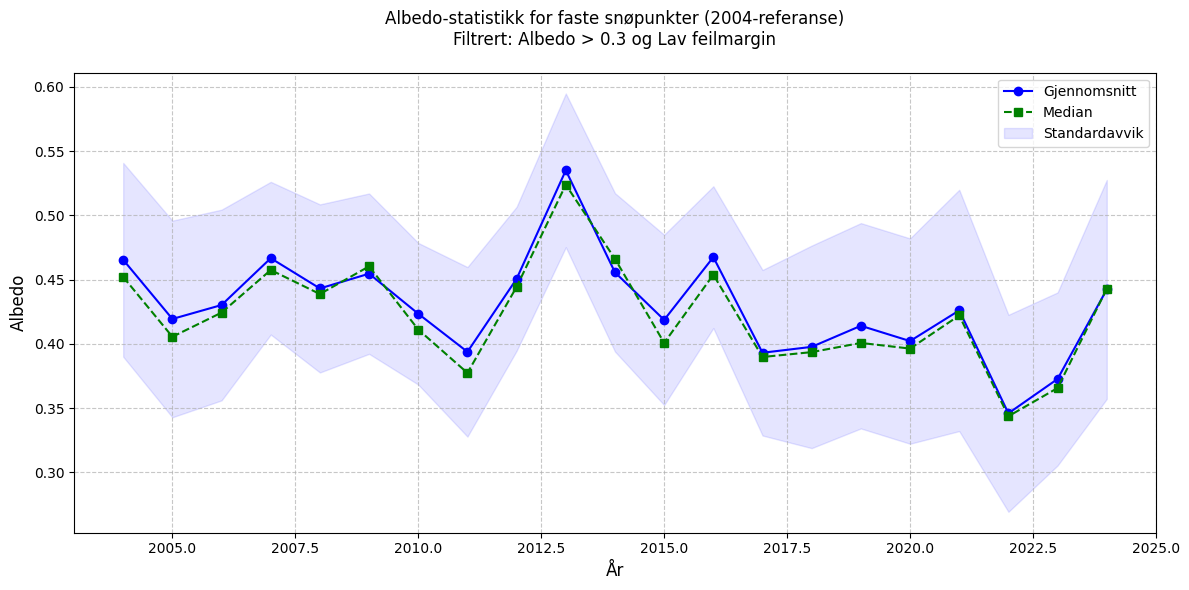

In [8]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

# Henter lav feilmargin fil og referansefil
referanse_2004 = pd.read_csv("../data/csv_albedo_effekt/Albedo effekt 2004.csv")
feilmargin = pd.read_csv("../data/csv_albedo_effekt/data_m-lavfeilmargin.csv")


# Merge og filtrer for referansepunkter (høy albedo >0.3, lav feilmargin)
felles_2004 = pd.merge(referanse_2004, feilmargin, on=["lat", "lon"], how="inner")
referanse_punkter = felles_2004[(felles_2004["AL-BB-DH"] > 0.3)][["lat", "lon"]]
print(f"🔍 Antall referansepunkter: {len(referanse_punkter)}")

# Hent filer fo alle år
datafiler = sorted(glob.glob("../data/csv_albedo_effekt/Albedo*.csv"))

# Initialiser lister for statistikk
årstall_liste = []
gjennomsnitt_liste = []
median_liste = []
std_liste = []

# Analyser hvert år basert på faste 2004-punkter
for fil in datafiler:
    df = pd.read_csv(fil)
    
    # Finn felles punkter med referanseåret
    felles = pd.merge(referanse_punkter, df, on=["lat", "lon"], how="inner")
    
    if not felles.empty and "AL-BB-DH" in felles.columns:
        # Beregn statistikk for de faste punktene
        gjennomsnitt = felles["AL-BB-DH"].mean()
        median = felles["AL-BB-DH"].median()
        std = felles["AL-BB-DH"].std()
    else:
        gjennomsnitt = median = std = np.nan
    
    # Hent årstall fra filnavn
    årstall = int(''.join(filter(str.isdigit, os.path.basename(fil))))
    
    # Lagre resultater
    årstall_liste.append(årstall)
    gjennomsnitt_liste.append(gjennomsnitt)
    median_liste.append(median)
    std_liste.append(std)
    

# Sorterer data etter årstall
sortert_indeks = np.argsort(årstall_liste)
årstall = np.array(årstall_liste)[sortert_indeks]
gjennomsnitt = np.array(gjennomsnitt_liste)[sortert_indeks]
median = np.array(median_liste)[sortert_indeks]
std = np.array(std_liste)[sortert_indeks]

# Matrise med resultater
albedo_matrise = np.column_stack((årstall, gjennomsnitt, median, std))
print(f"Gjennomsnittlig forskjell mellom median og gjennomsnitt {np.mean(np.abs(albedo_matrise[:,1] - albedo_matrise[:,2]))}")  
print("\n📊 Statistikkmatrise for faste snøpunkter:")
print("[År, Gjennomsnitt, Median, Standardavvik]")
np.set_printoptions(suppress=True, precision=4)
print(albedo_matrise)

# Plotting med standardavvik som fylt område
plt.figure(figsize=(12, 6))

# Plot med gjennomsnitt og median
plt.plot(årstall, gjennomsnitt, 'o-', label='Gjennomsnitt', color='blue')
plt.plot(årstall, median, 's--', label='Median', color='green')

# Legger til standardavvik som fylt område
plt.fill_between(årstall, 
                gjennomsnitt - std, 
                gjennomsnitt + std, 
                color='blue', alpha=0.1, label='Standardavvik')

# Konfigurer plot
plt.title("Albedo-statistikk for faste snøpunkter (2004-referanse)\n"
          "Filtrert: Albedo > 0.3 og Lav feilmargin", pad=20)
plt.xlabel("År", fontsize=12)
plt.ylabel("Albedo", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Kode 4

Koden bruker scipy og regner ut korrelasjon og p verdi.
Korrelasjonen er styrken og retningen og varrierer hendholdvis fra -1 til 1. Postiv betyr den øker og jo nærmere 0 jo mindre er styrken.
P verdi sier om korrelasjonen er statistisk signifikant. (<0.05)

### Kommentar
"r = -0.4494, p-verdi = 0.0410"
Koden har en moderat negativ korrelasjon og er 95% sikker på at korrelasjonen ikke skylder tilfeldigheter. Desto flere år de måler i fremtiden desto mer nøyaktig vil korrelajonen være, hvis temperaturen forsetter å øke.

In [51]:
from scipy.stats import pearsonr

# Fjern eventuelle NaN-verdier før korrelasjonsberegning
x = np.array(albedo_matrise[:,0])
y = np.array(albedo_matrise[:,1])
mask = ~np.isnan(y)
x = x[mask]
y = y[mask]

# Pearson korrelasjon
r, p = pearsonr(x, y)
print(f" Pearson korrelasjon mellom år og albedo: \n r = {r:.4f}, p-verdi = {p:.4f}")

 Pearson korrelasjon mellom år og albedo: 
 r = -0.4494, p-verdi = 0.0410
